In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
data=pd.read_csv('E:\\Data.csv')
data.head()

,user_id,last_transacion_date,purchase_count,retention_rate,sum_CashAmount,avg_basket
0,10001,1402-04-17,2,41,0,2.537704e+07
1,10002,1402-03-14,2,1,0,3.650150e+06
2,10003,1402-08-06,1,0,12419047,5.000000e+07
3,10004,1402-09-06,17,256,0,5.204899e+06
4,10005,1402-07-10,10,62,0,8.417279e+06


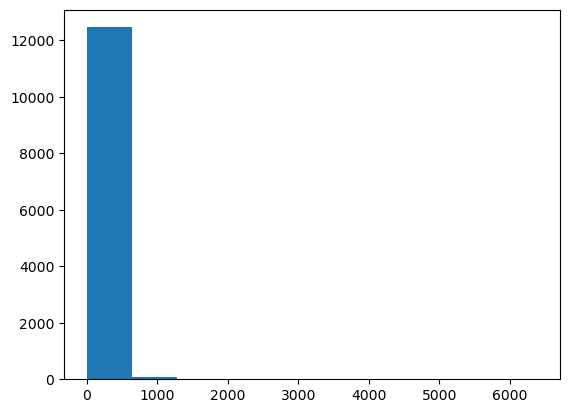

In [15]:
plt.hist(data['retention_rate'])
plt.show()

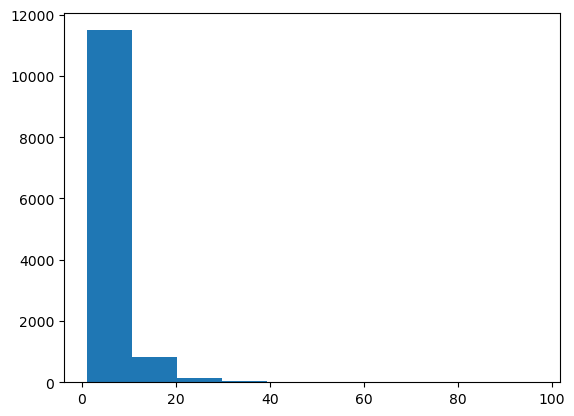

In [14]:
plt.hist(data['purchase_count'])
plt.show()

C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\a

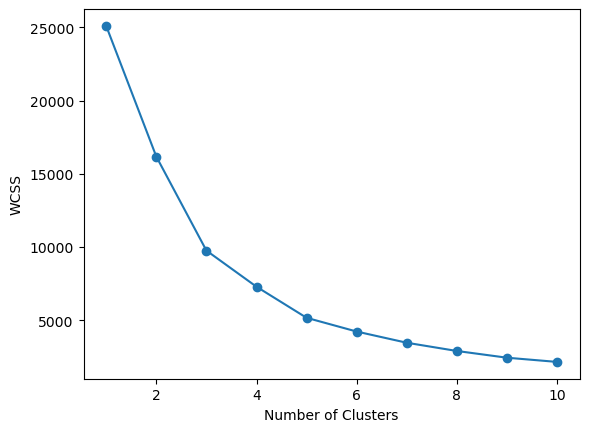

In [25]:
features = data[['purchase_count', 'avg_basket']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\ProgramData\anaconda3\anacondaa\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


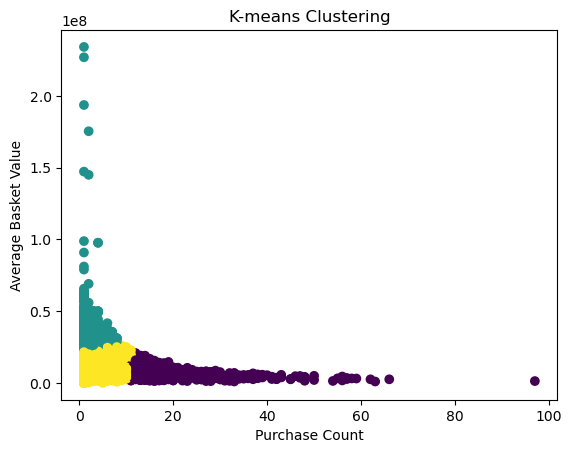

In [24]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

plt.scatter(data['purchase_count'], data['avg_basket'], c=data['cluster'])
plt.title('K-means Clustering')
plt.xlabel('Purchase Count')
plt.ylabel('Average Basket Value')
plt.show()

برای این دیتا سه خوشه مناسب است
با توجه به مقادیری که برای
treshold
تعیین کردیم،
از خوشه مد نظر نمونه گیری میکنیم

In [28]:
customers = (data['purchase_count'] > 5) & (data['avg_basket'] > 2e7)
sampled_customers = data[customers].sample(n=100, random_state=42)
print(sampled_customers)

       user_id last_transacion_date  purchase_count  retention_rate  \
943      10944           1402-08-30               6             128   
2195     12196           1402-08-26               7             219   
10615    20616           1402-09-14               7             211   
4744     14745           1402-09-02               7             259   
10373    20374           1402-08-16               6             120   
...        ...                  ...             ...             ...   
4892     14893           1402-06-01               6             169   
4795     14796           1402-06-24               8             182   
4997     14998           1402-09-17               7             209   
1860     11861           1402-09-16               6             139   
7833     17834           1402-09-02               6             203   

       sum_CashAmount   avg_basket  cluster  
943                 0  24121948.50        2  
2195                0  22673266.71        2  
10615    